In [76]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('regression_variables.csv')
#df = df[df['topword_n_extend']>0]
#df.shape

In [77]:
directions = {'arun_2010': 'minimize',
 'cao_juan_2009': 'minimize',
 'semantic_coherence_10': 'maximize',
 'griffiths_2004': 'maximize',
 'loglikelihood': 'maximize'}
measures = ['arun_2010','cao_juan_2009','coherence_mimno_2011','griffiths_2004','loglikelihood']    
model_controls = ['n_topics', # control for K topics.
    'best_predictive','best_predictive_top3','best_predictive_top5','best_predictive_eyeball', # pv
                 'selection_pv_inherit',
                  'selection_pv',#pv
                  'selection_qual','selection_quant','selection_quant_parsimonous','selection_quant_best' 
                  #selection
                 ]+measures

topic_controls = ['topic_label_doc',
                  'topic_frexlabel_doc',
                  'topword_n',
                  'topword_n_extend',
                  'topword_n_frex',
                  'topword_n_frex_extent',# manual inspections
                  'semantic_coherence_10','semantic_exclusivity_10',
                  'predictive_validity',
                  'predictive_validity_individual',
                  'predictive_validity_eyeball_individual'# 
                 ]
category_controls = ['n_words',
 'n_docs',
 'categorization_entropy',
 'word_entropy',
 'category_coherence_relative',
 'category_distinctiveness',
 'precision',
 'weighted_recall']
y_cols = ['human_performance','human_performance_frex','timeseries_correlation_robust','timeseries_correlation_individual','weighted_precision_frex','weighted_precision']

### Analysis:
Frex inefficiency. 



In [83]:
topic_controls = ['topic_label_doc',
                 # 'topic_frexlabel_doc',
               #   'topword_n',
                  #'topword_n_extend',
               #   'topword_n_frex',
                  #'topword_n_frex_extent',# manual inspections
                  #'semantic_coherence_10','semantic_exclusivity_10',
                  #'predictive_validity',
                  #'predictive_validity_individual',
                  #'predictive_validity_eyeball_individual'# 
                 ]
category_controls = ['n_words',
 'n_docs',
# 'categorization_entropy',
 'word_entropy',
 'category_coherence_relative',
 #'category_distinctiveness',
 'precision',
 'weighted_recall']



In [46]:
df.columns

Index(['frex_label', 'topword_label', 'human_performance',
       'human_performance_frex', 'timeseries_correlation_robust',
       'timeseries_correlation_individual', 'weighted_precision_frex',
       'weighted_precision', 'n_words', 'n_docs', 'categorization_entropy',
       'word_entropy', 'category_coherence_relative',
       'category_distinctiveness', 'precision', 'weighted_recall',
       'topic_label_doc', 'topic_frexlabel_doc', 'topword_n',
       'topword_n_extend', 'topword_n_frex', 'topword_n_frex_extent',
       'semantic_coherence_10', 'semantic_exclusivity_10',
       'predictive_validity', 'predictive_validity_individual',
       'predictive_validity_eyeball_individual', 'n_topics', 'best_predictive',
       'best_predictive_top3', 'best_predictive_top5',
       'best_predictive_eyeball', 'selection_pv_inherit', 'selection_pv',
       'selection_qual', 'selection_quant', 'selection_quant_parsimonous',
       'selection_quant_best', 'loglikelihood', 'arun_2010', 'griffi

In [84]:

temp = df[df['frex_label'].apply(np.isfinite)]
temp = temp[temp.topword_n>0]
print(temp.shape)
#temp = temp[temp['frex_label'] = temp.topword_label]
print(temp.shape)
cols = category_controls + topic_controls

X = temp[cols].values
idx = np.isfinite(X).sum(axis=1)==len(cols)
temp = temp[idx]
X = X[idx]
y_col = y_cols[0]
y = temp[y_col].values

X = sm.add_constant(X)
mod = sm.OLS(y,X)

res = mod.fit()
print(res.summary(xname=['constant']+cols))

(197299, 46)
(197299, 46)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                 2.416e+04
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:13:32   Log-Likelihood:                 47989.
No. Observations:              131268   AIC:                        -9.596e+04
Df Residuals:                  131260   BIC:                        -9.588e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [85]:
residuals = y-res.params.dot(X.T)

In [86]:
frex = pd.DataFrame({'topword_n':temp['topword_n_frex'],'residuals':residuals,'type':'frex','topic':temp['topword_label']})
top = pd.DataFrame({'topword_n':temp['topword_n'],'residuals':residuals,'type':'top','topic':temp['topword_label']})
temp =pd.concat([top,frex])

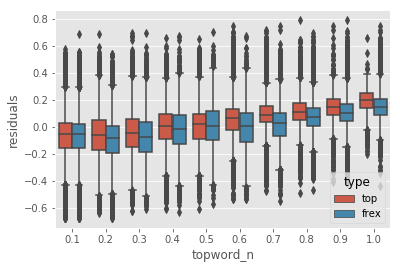

In [87]:
ax = sns.boxplot(x='topword_n',y='residuals',data=temp,hue='type')
plt.savefig('output/descriptives/frex_vs_top_control+docinspect.png',bbox_inches='tight')

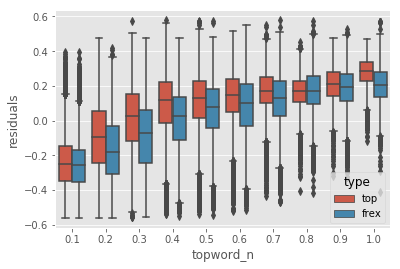

In [82]:
ax = sns.boxplot(x='topword_n',y='residuals',data=temp,hue='type')
plt.savefig('output/descriptives/frex_vs_top_control.png',bbox_inches='tight')

In [43]:

#for top,groupdf in temp.groupby(['topic']):
    
#    sns.lineplot(x='topword_n',y='residuals',data=groupdf,hue='type',legend=False)

## Model Selection

In [95]:
measures = ['loglikelihood', 'arun_2010', 'griffiths_2004', 'cao_juan_2009']
#measures = ['arun_2010','cao_juan_2009','coherence_mimno_2011','griffiths_2004','loglikelihood']    
model_controls = ['n_topics', # control for K topics.
    'best_predictive','best_predictive_top3','best_predictive_top5','best_predictive_eyeball', # pv
                 'selection_pv_inherit',
           #       'selection_pv',#pv
                  'selection_qual','selection_quant','selection_quant_parsimonous','selection_quant_best' 
                  #selection
                 ]+measures

topic_controls = ['topic_label_doc',
                  #'topic_frexlabel_doc',
                  #'topword_n',
                  'topword_n_extend',
                  #'topword_n_frex',
                  #'topword_n_frex_extent',# manual inspections
                  #'semantic_coherence_10','semantic_exclusivity_10',
                  #'predictive_validity',
                #  'predictive_validity_individual',
                  #'predictive_validity_eyeball_individual'# 
                 ]
category_controls = ['n_words',
 'n_docs',
 'categorization_entropy',
 'word_entropy',
 'category_coherence_relative',
 'category_distinctiveness',
 'precision',
 'weighted_recall']

sample = df[df.accept]


In [96]:
y_col = y_cols[0]
cols = category_controls+topic_controls 
#cols += model_controls[0:1] # control for no. of topics K
X = sample[cols].values
X = X.astype(float)
y_col = y_cols[-1]
y = sample[y_col].values

X = sm.add_constant(X)
mod = sm.OLS(y,X)
res = mod.fit()

residuals = y - res.params.dot(X.T)


In [97]:
temp = []
model_controls_binary = [
                         'selection_qual'
                         ,'selection_quant_parsimonous'
                         ,'selection_quant_best'
                         ,'selection_quant',
                        'selection_pv_inherit'
                        ]
for i in model_controls_binary[:]:
    if i in measures:
        continue
    x = sample[i]
    temp_res = residuals[x==1]
    
    temp.append(pd.DataFrame({'residuals':temp_res,'type':i}))
temp.append(pd.DataFrame({'residuals':residuals,'type':'all'}))
temp = pd.concat(temp)

In [98]:
trans_sel_types = {'all':'all','selection_qual':'substantive'
                   ,'selection_quant':'quant_top10','selection_quant_parsimonous'
                   :'quant_granularity','selection_quant_best':'quant_best','selection_pv':'predictive_validity','selection_pv_inherit':'predictive_validity_inherit'}
temp['selection criteria'] = temp['type'].apply(lambda x: trans_sel_types[x])


In [100]:
! ls output

bias		descriptives	 research_conclusions
conglomeration	noise_detection  time_series


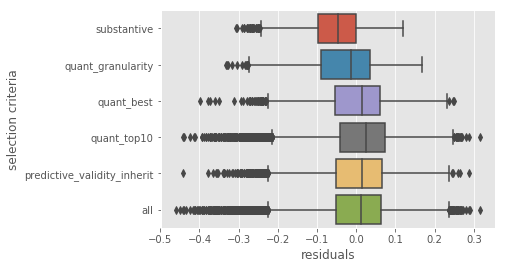

In [103]:
sns.boxplot(y='selection criteria',x='residuals',data=temp)
plt.savefig('output/descriptives/model_selection_performance_controls.png',bbox_inches='tight')

In [59]:
import statsmodels.api as sm

for col in model_controls[1:]: # 
    
    cols = category_controls+topic_controls 
    cols += model_controls[0:1] # control for no. of topics K
    cols+=[col] 
    X = sample[cols].values
    X = X.astype(float)
    y_col = y_cols[-1]
    y = sample[y_col].values
    
    X = sm.add_constant(X)
    mod = sm.OLS(y,X)
    res = mod.fit()
    
    residuals = 
    #print(res.summary(xname=['constant']+cols))
    print(col,res.tvalues[-1])

best_predictive 1.8062626905328927
best_predictive_top3 3.451748064398221
best_predictive_top5 4.039540017796701
best_predictive_eyeball 0.08808148144931895
selection_pv_inherit 0.44903361417239684
selection_qual -5.690474909258063
selection_quant -0.9391330038683168
selection_quant_parsimonous -0.804922913885392
selection_quant_best 0.7738133283626495
loglikelihood 4.091798353514605
arun_2010 -16.053445774541295
griffiths_2004 3.7849978086522142
cao_juan_2009 -15.519459495391448


In [57]:
import statsmodels.api as sm
sample = df[df.accept]
for col in model_controls[1:]: # 
    
    cols = category_controls+topic_controls 
    #cols += model_controls[0:1] # control for no. of topics K
    cols+=[col] 
    X = sample[cols].values
    X = X.astype(float)
    y_col = y_cols[-1]
    y = sample[y_col].values
    
    X = sm.add_constant(X)
    mod = sm.OLS(y,X)
    res = mod.fit()
    #print(res.summary(xname=['constant']+cols))
    print(col,res.tvalues[-1])

best_predictive 18.134480463116148
best_predictive_top3 26.693614326152044
best_predictive_top5 32.96134953907001
best_predictive_eyeball 1.9292702140933236
selection_pv_inherit 5.131590858568583
selection_pv -10.984860677237519
selection_qual -25.115430730879062
selection_quant 34.273202678309104
selection_quant_parsimonous -16.073175162669227
selection_quant_best -0.8677295633464079
loglikelihood 19.78966325336279
arun_2010 -92.25462632670202
griffiths_2004 4.314544506488368
cao_juan_2009 -90.0297840108357


In [54]:
directions

{'arun_2010': 'minimize',
 'cao_juan_2009': 'minimize',
 'semantic_coherence_10': 'maximize',
 'griffiths_2004': 'maximize',
 'loglikelihood': 'maximize'}

In [186]:
topic_controls = [#'semantic_coherence_10','semantic_exclusivity_10',
    #'topic_label_doc',
                  'topword_n',
                  #'topword_n_extend',
                  'topword_n_frex',
                 # 'topword_n_frex_extent',# manual inspections
                  
                  #'predictive_validity',
                  #'predictive_validity_individual',
                  #'predictive_validity_eyeball_individual'# 
                 ]


In [ ]:
## With both

0.014208161729237046 0.5151524504492078 0.9402186413494976
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 2.150e+05
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:08:40   Log-Likelihood:                 70036.
No. Observations:               85650   AIC:                        -1.401e+05
Df Residuals:                   85640   BIC:                        -1.400e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

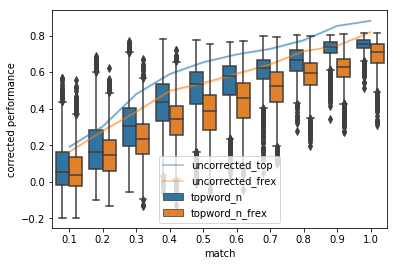

In [197]:
y_col = y_cols[0]
y = df[y_col].values
print(y.min(),np.median(y),y.max())
constant = False
dfs = []
for num,col in enumerate(topic_controls):
    if num==0:
        other = topic_controls[1:]
    else:
        other = topic_controls[0:1]
    cols = category_controls+other+[col]#topic_controls
    
    X = df[cols].values
    X = X.astype(float)
    if constant:
        X = sm.add_constant(X)
        cols = ['constant']+cols
    mod = sm.OLS(y,X)
    
    res = mod.fit()
    x = X[:,-1]
    print(res.summary(xname=cols))
    # residuals.
    #pred = res.params[1:-1].dot(X[:,1:-1].T)
    pred = res.params[:].dot(X[:,:].T)
    residuals = y-pred
    
    print(sum(abs(residuals))/sum(y),sum(residuals**2)/sum(y**2))
    if constant:
        pred2 = res.params[1:-2].dot(X[:,1:-2].T)
    else:
        pred2 = res.params[:-2].dot(X[:,:-2].T)
    #print(pred2.mean())
    
    temp = pd.DataFrame({'match':X[:,-1],'residuals':residuals,'type':col,'corrected_bias':y-pred2})
    temp = pd.DataFrame({'match':X[:,-1],'residuals':residuals,'type':col,'corrected_bias':y-pred2,'y':y})
    d = dict(list(zip(list(sorted(set(temp.match))),list(np.arange(temp.match.nunique())))))
    temp['bins'] = temp['match'].apply(lambda x: d[x])
    if 'frex' in col:
        label = 'uncorrected_frex'
    else:
        label = 'uncorrected_top'
    sns.lineplot(x='bins',y='y',data=temp,estimator=np.median,label=label,alpha=0.5)

    dfs.append(temp)
topword_df = pd.concat(dfs)


sns.boxplot(x='match',y='corrected_bias',data=topword_df,hue='type')
plt.legend(loc='lower center')
plt.ylabel('corrected performance')
plt.savefig('output/descriptives/frex_vs_top_corrected_dict.png')

In [201]:
#sns.lineplot(x='match',y='y',data=temp)

0.0009939343637686622 0.4877340799732962 0.9612890282849068
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.095e+05
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:10:27   Log-Likelihood:                 48246.
No. Observations:               85650   AIC:                        -9.647e+04
Df Residuals:                   85640   BIC:                        -9.638e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

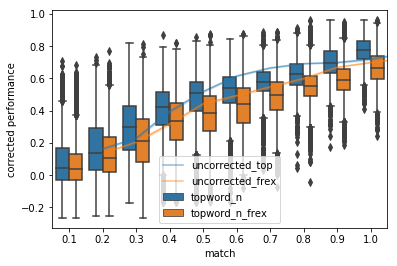

In [202]:
y_col = 'human_performance'
#y_col = y_cols[-1]
y = df[y_col].values
print(y.min(),np.median(y),y.max())
constant = False
dfs = []
for num,col in enumerate(topic_controls):
    if num==0:
        other = topic_controls[1:]
    else:
        other = topic_controls[0:1]
    cols = category_controls+other+[col]#topic_controls
    
    X = df[cols].values
    X = X.astype(float)
    if constant:
        X = sm.add_constant(X)
        cols = ['constant']+cols
    mod = sm.OLS(y,X)
    
    res = mod.fit()
    x = X[:,-1]
    print(res.summary(xname=cols))
    # residuals.
    #pred = res.params[1:-1].dot(X[:,1:-1].T)
    pred = res.params[:].dot(X[:,:].T)
    residuals = y-pred
    
    print(sum(abs(residuals))/sum(y),sum(residuals**2)/sum(y**2))
    if constant:
        pred2 = res.params[1:-2].dot(X[:,1:-2].T)
    else:
        pred2 = res.params[:-2].dot(X[:,:-2].T)
    #print(pred2.mean())
    
    temp = pd.DataFrame({'match':X[:,-1],'residuals':residuals,'type':col,'corrected_bias':y-pred2,'y':y})
    d = dict(list(zip(list(sorted(set(temp.match))),list(np.arange(temp.match.nunique())))))
    temp['bins'] = temp['match'].apply(lambda x: d[x])
    if 'frex' in col:
        label = 'uncorrected_frex'
    else:
        label = 'uncorrected_top'
    sns.lineplot(x='bins',y='y',data=temp,estimator=np.median,label=label,alpha=0.5)
    dfs.append(temp)
topword_df = pd.concat(dfs)


sns.boxplot(x='match',y='corrected_bias',data=topword_df,hue='type')
plt.legend(loc='lower center')
plt.ylabel('corrected performance')
plt.savefig('output/descriptives/frex_vs_top_corrected_human.png')

In [205]:
pred2

array([0.03714308, 0.03714308, 0.03714308, ..., 0.22368768, 0.22368768,
       0.22368768])

In [208]:
res.params[0:-2]

array([-2.62821268e-03, -1.27880451e-05, -7.99326589e-02,  1.89378464e-01,
       -1.45763134e-01, -1.17645667e-02,  8.25672253e-01, -8.69358487e-02])

In [214]:
res.params[0:-2]#.dot(X[:,0:-2].T)

array([-2.62821268e-03, -1.27880451e-05, -7.99326589e-02,  1.89378464e-01,
       -1.45763134e-01, -1.17645667e-02,  8.25672253e-01, -8.69358487e-02])

In [224]:
beta = res.params[0:-2]
list(zip(X[0,:-2],beta))

[(140.0, -0.0026282126849063348),
 (3351.0, -1.2788045095687066e-05),
 (8.088846383459062, -0.07993265894723624),
 (3.095813251244308, 0.18937846404490388),
 (0.9115280661473611, -0.14576313384488995),
 (7.08696189785784, -0.01176456669535319),
 (0.9772727272727272, 0.8256722534368297),
 (0.9482454092049408, -0.08693584865272944)]

In [242]:
beta.dot(X[20000,:-2])

0.04182985492173441

(array([ 9278.,     0., 17159.,  6030., 15479., 10814., 15889.,  6081.,
         4208.,   712.]),
 array([-0.02715262,  0.00229859,  0.03174981,  0.06120102,  0.09065223,
         0.12010345,  0.14955466,  0.17900588,  0.20845709,  0.2379083 ,
         0.26735952]),
 <a list of 10 Patch objects>)

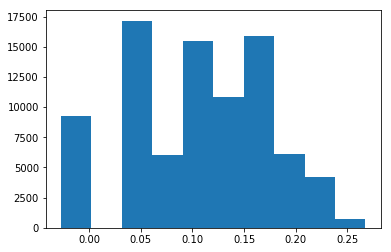

In [241]:
plt.hist(beta.dot(X[:,:-2].T))

In [95]:
if constant:
    pred = res.params[1:-1].dot(X[:,1:-1].T)
else:
    pred = res.params[:-1].dot(X[:,:-1].T)


In [101]:
pred = res.params[:].dot(X[:,:].T)

(array([ 8444., 10861., 11294., 10238.,  8526.,  8829.,  7509.,  9345.,
        14697., 11545.]),
 array([-0.01317405,  0.06512699,  0.14342802,  0.22172906,  0.3000301 ,
         0.37833114,  0.45663218,  0.53493322,  0.61323426,  0.69153529,
         0.76983633]),
 <a list of 10 Patch objects>)

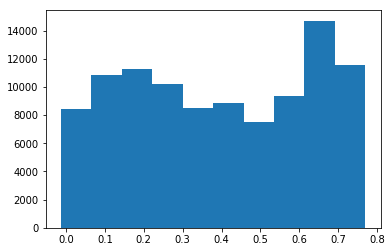

In [102]:
plt.hist(pred)

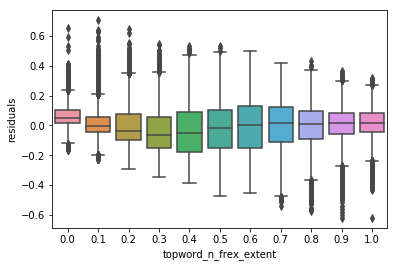

In [105]:
# residuals
temp = pd.DataFrame({col:X[:,-1],'residuals':y-pred,'y':y})
sns.boxplot(x=col,y='residuals',data=temp)
d = dict(list(zip(list(sorted(set(temp[col]))),list(np.arange(temp[col].nunique())))))
temp['bins'] = temp[col].apply(lambda x: d[x])
#sns.lineplot(x='bins',y='y',data=temp,estimator=np.median,label='uncorrected_frex')

In [106]:
#sns.lineplot(x=col,y='y',data=temp)

In [107]:
#sns.distplot(pred,bins=5)#,np.linspace(-0.3,0,10))

In [20]:
#res.params

array([-5.53821485e-01,  7.75863581e-04, -2.56565386e-05,  3.10071115e-01,
       -1.26020746e-01, -2.93784581e-01, -6.48018012e-02,  6.30247735e-02,
       -9.66583212e-01,  1.76860519e-01,  4.35175687e-01,  7.00898718e-02,
        1.77887898e-02,  1.59903909e-02])

## Model selection effects

In [ ]:

for col in model_controls[1:]: # 
    
    cols = category_controls+topic_controls 
    #cols += model_controls[0:1] # control for no. of topics K
    cols+=[col] 
    X = sample[cols].values
    X = X.astype(float)
    y_col = y_cols[-1]
    y = sample[y_col].values
    import statsmodels.api as sm
    X = sm.add_constant(X)
    mod = sm.OLS(y,X)
    res = mod.fit()
    #print(res.summary(xname=['constant']+cols))
    print(col,res.tvalues[-1])

## Control for K

In [ ]:

for col in model_controls[1:]: # 
    
    cols = category_controls+topic_controls 
    cols += model_controls[0:1] # control for no. of topics K
    cols+=[col] 
    X = sample[cols].values
    X = X.astype(float)
    y_col = y_cols[-1]
    y = sample[y_col].values
    import statsmodels.api as sm
    X = sm.add_constant(X)
    mod = sm.OLS(y,X)
    res = mod.fit()
    #print(res.summary(xname=['constant']+cols))
    print(col,res.tvalues[-1])